In [1]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style
import unicodedata
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

style.use('fivethirtyeight')

from PIL import Image
import urllib
import os
import math
from PIL import Image
import matplotlib.image as image
pd.options.display.max_columns = None

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [2]:
keepers = ['GK']
defenders = ["DF",'DF,MF']
wing_backs = ['FW,DF','DF,FW']
defensive_mids = ['MF,DF']
midfielders = ['MF']
attacking_mids = ['MF,FW',"FW,MF"]
forwards = ['FW']
def position_grouping(x):
    if x in keepers:
        return "GK"
    elif x in defenders:
        return "Defender"
    elif x in wing_backs:
        return "Wing-Back"
    elif x in defensive_mids:
        return "Defensive-Midfielders"
    elif x in midfielders:
        return "Central Midfielders"
    elif x in attacking_mids:
        return "Attacking Midfielders"
    elif x in forwards:
        return "Forwards"
    else:
        return "unidentified position"

In [3]:
fbref_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
fbref_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
fbref_pass_type = 'https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats'
fbref_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
fbref_gca = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'
fbref_poss = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'
fbref_misc = 'https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats'

In [4]:
def create_full_stats_db():
    # Passing columns 
    pass_ = 'https://fbref.com/en/comps/9/passing/Premier-League-Stats'
    page =requests.get(pass_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_).text.replace('<!--', '').replace('-->', '')
    pass_df = pd.read_html(html_content)
    pass_df[-1].columns = pass_df[-1].columns.droplevel(0)
    pass_stats = pass_df[-1]
    pass_prefixes = {1: 'Total - ', 2: 'Short - ', 3: 'Medium - ', 4: 'Long - '}
    pass_column_occurrences = {'Cmp': 0, 'Att': 0, 'Cmp%': 0}
    pass_new_column_names = []
    for col_name in pass_stats.columns:
        if col_name in pass_column_occurrences:
            pass_column_occurrences[col_name] += 1
            prefix = pass_prefixes[pass_column_occurrences[col_name]]
            pass_new_column_names.append(prefix + col_name)
        else:
            pass_new_column_names.append(col_name)
    pass_stats.columns = pass_new_column_names
    pass_stats = pass_stats[pass_stats['Player'] != 'Player']

    # Shooting columns 
    shot_ = 'https://fbref.com/en/comps/9/shooting/Premier-League-Stats'
    page =requests.get(shot_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(shot_).text.replace('<!--', '').replace('-->', '')
    shot_df = pd.read_html(html_content)
    shot_df[-1].columns = shot_df[-1].columns.droplevel(0) # drop top header row
    shot_stats = shot_df[-1]
    shot_stats = shot_stats[shot_stats['Player'] != 'Player']    



    # Pass Type columns 
    pass_type = 'https://fbref.com/en/comps/9/passing_types/Premier-League-Stats'
    page =requests.get(pass_type)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_type).text.replace('<!--', '').replace('-->', '')
    pass_type_df = pd.read_html(html_content)
    pass_type_df[-1].columns = pass_type_df[-1].columns.droplevel(0) # drop top header row
    pass_type_stats = pass_type_df[-1]
    pass_type_stats = pass_type_stats[pass_type_stats['Player'] != 'Player']


    # GCA columns 
    gca_ = 'https://fbref.com/en/comps/9/gca/Premier-League-Stats'
    page =requests.get(gca_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(gca_).text.replace('<!--', '').replace('-->', '')
    gca_df = pd.read_html(html_content)
    gca_df[-1].columns = gca_df[-1].columns.droplevel(0)
    gca_stats = gca_df[-1]
    gca_prefixes = {1: 'SCA - ', 2: 'GCA - '}
    gca_column_occurrences = {'PassLive': 0, 'PassDead': 0, 'TO%': 0, 'Sh': 0, 'Fld': 0, 'Def': 0}
    gca_new_column_names = []
    for col_name in gca_stats.columns:
        if col_name in gca_column_occurrences:
            gca_column_occurrences[col_name] += 1
            prefix = gca_prefixes[gca_column_occurrences[col_name]]
            gca_new_column_names.append(prefix + col_name)
        else:
            gca_new_column_names.append(col_name)
    gca_stats.columns = gca_new_column_names
    gca_stats = gca_stats[gca_stats['Player'] != 'Player']
    

    # Defense columns 
    defence_ = 'https://fbref.com/en/comps/9/defense/Premier-League-Stats'
    page =requests.get(defence_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(defence_).text.replace('<!--', '').replace('-->', '')
    defence_df = pd.read_html(html_content)
    defence_df[-1].columns = defence_df[-1].columns.droplevel(0) # drop top header row
    defence_stats = defence_df[-1]
    rename_columns = {
    'Def 3rd': 'Tackles - Def 3rd',
    'Mid 3rd': 'Tackles - Mid 3rd',
    'Att 3rd': 'Tackles - Att 3rd',
    'Blocks': 'Total Blocks',
    'Sh': 'Shots Blocked',
    'Pass': 'Passes Blocked'}
    defence_stats.rename(columns = rename_columns, inplace=True)
    defence_prefixes = {1: 'Total - ', 2: 'Dribblers- '}
    defence_column_occurrences = {'Tkl': 0}
    new_column_names = []
    for col_name in defence_stats.columns:
        if col_name in defence_column_occurrences:
            defence_column_occurrences[col_name] += 1
            prefix = defence_prefixes[defence_column_occurrences[col_name]]
            new_column_names.append(prefix + col_name)
        else:
            new_column_names.append(col_name)
    defence_stats.columns = new_column_names
    defence_stats = defence_stats[defence_stats['Player'] != 'Player']


    # possession columns 
    poss_ = 'https://fbref.com/en/comps/9/possession/Premier-League-Stats'
    page =requests.get(poss_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(poss_).text.replace('<!--', '').replace('-->', '')
    poss_df = pd.read_html(html_content)
    poss_df[-1].columns = poss_df[-1].columns.droplevel(0) # drop top header row
    poss_stats = poss_df[-1]
    rename_columns = {
    'TotDist': 'Carries - TotDist',
    'PrgDist': 'Carries - PrgDist',
    'PrgC': 'Carries - PrgC',
    '1/3': 'Carries - 1/3',
    'CPA': 'Carries - CPA',
    'Mis': 'Carries - Mis',
    'Dis': 'Carries - Dis',
    'Att': 'Take Ons - Attempted'  }
    poss_stats.rename(columns=rename_columns, inplace=True)
    poss_stats = poss_stats[poss_stats['Player'] != 'Player']


    # misc columns 
    misc_ = 'https://fbref.com/en/comps/9/misc/Premier-League-Stats'
    page =requests.get(misc_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(misc_).text.replace('<!--', '').replace('-->', '')
    misc_df = pd.read_html(html_content)
    misc_df[-1].columns = misc_df[-1].columns.droplevel(0) # drop top header row
    misc_stats = misc_df[-1]
    misc_stats = misc_stats[misc_stats['Player'] != 'Player']

    index_df = misc_stats[['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s']]

    data_frames = [poss_stats, misc_stats, pass_stats ,defence_stats, shot_stats, gca_stats, pass_type_stats]
    for df in data_frames:
        if df is not None:  # Checking if the DataFrame exists
            df.drop(columns=['Matches', 'Rk'], inplace=True, errors='ignore')
            df.dropna(axis=0, how='any', inplace=True)

            index_df = pd.merge(index_df, df, on=['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s'], how='left')
    index_df["position_group"] = index_df.Pos.apply(lambda x: position_grouping(x))  

    index_df.fillna(0, inplace=True)

    non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
    
    def clean_non_convertible_values(value):
        try:
            return pd.to_numeric(value)
        except (ValueError, TypeError):
            return np.nan

    # Iterate through each column, converting non-numeric columns to numeric
    for col in index_df.columns:
        if col not in non_numeric_cols:
            index_df[col] = index_df[col].apply(clean_non_convertible_values)

    
    return index_df



In [5]:
stats = create_full_stats_db()

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
stats

,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live_x,Take Ons - Attempted,Succ,Succ%,Tkld,Tkld%,Carries,Carries - TotDist,Carries - PrgDist,Carries - PrgC,Carries - 1/3,Carries - CPA,Carries - Mis,Carries - Dis,Rec,PrgR,CrdY,CrdR,2CrdY,Fls,Fld,Off_x,Crs_x,Int_x,TklW_x,PKwon,PKcon,OG,Recov,Won,Lost_x,Won%,Total - Cmp,Total - Att,Total - Cmp%,TotDist,PrgDist,Short - Cmp,Short - Att,Short - Cmp%,Medium - Cmp,Medium - Att,Medium - Cmp%,Long - Cmp,Long - Att,Long - Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Total - Tkl,TklW_y,Tackles - Def 3rd,Tackles - Mid 3rd,Tackles - Att 3rd,Dribblers- Tkl,Att_x,Tkl%,Lost_y,Total Blocks,Shots Blocked,Passes Blocked,Int_y,Tkl+Int,Clr,Err,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK_x,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,SCA,SCA90,SCA - PassLive,SCA - PassDead,TO,SCA - Sh,SCA - Fld,SCA - Def,GCA,GCA90,GCA - PassLive,GCA - PassDead,TO,GCA - Sh,GCA - Fld,GCA - Def,Att_y,Live_y,Dead,FK_y,TB,Sw,Crs_y,TI,CK,In,Out,Str,Cmp,Off_y,Blocks,position_group
0,Max Aarons,eng ENG,DF,Bournemouth,24-360,2000,0.9,61,1,15,33,14,0,61,2,0,0.0,1,50.0,35,135,61,1,0,0,1,0,34,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,42,53,79.2,738,302,18,21,85.7,19,23,82.6,4,7,57.1,0,0.0,0.0,0.0,0,6,0,0,7,2,2,1,1,0,1,1,100.0,0,2,1,1,0,2,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,2,2.34,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,53,45,8,2,0,0,2,6,0,0,0,0,42,0,1,Defender
1,Tyler Adams,us USA,MF,Bournemouth,25-319,1999,5.4,313,12,74,186,54,7,313,4,0,0.0,3,75.0,145,624,266,3,5,1,5,5,153,0,2,0,0,12,5,0,0,19,20,0,1,0,30,7,2,77.8,187,223,83.9,2980,707,91,103,88.3,85,97,87.6,6,13,46.2,0,0.4,0.1,-0.4,4,14,1,0,22,28,20,10,15,3,12,19,63.2,7,6,3,3,19,47,11,0,0,5,1,20.0,0.93,0.19,0.00,0.00,17.2,0,0,0,1.1,1.1,0.21,-1.1,-1.1,13,2.41,10,0,0,0,0,3,0,0.00,0,0,0,0,0,0,223,212,10,10,1,0,0,0,0,0,0,0,187,1,3,Central Midfielders
2,Tosin Adarabioyo,eng ENG,DF,Chelsea,27-096,1997,5.9,498,69,263,231,5,4,498,1,1,100.0,0,0.0,305,1065,549,0,0,0,0,0,377,0,1,0,0,2,2,1,0,3,8,0,0,0,17,14,7,66.7,413,450,91.8,7453,3016,169,177,95.5,215,222,96.8,27,44,61.4,0,0.0,0.1,0.0,1,16,0,0,13,10,8,8,2,0,6,8,75.0,2,4,3,1,3,13,25,0,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,6,1.02,4,0,0,2,0,0,0,0.00,0,0,0,0,0,0,450,433,16,10,0,1,0,1,0,0,0,0,413,1,3,Defender
3,Simon Adingra,ci CIV,"FW,MF",Brighton,22-363,2002,4.1,219,3,31,70,122,26,219,21,8,38.1,13,61.9,149,1013,486,16,11,8,21,5,155,62,0,0,0,6,0,0,14,4,4,0,0,0,21,1,1,50.0,110,146,75.3,1613,377,68,79,86.1,33,43,76.7,7,13,53.8,1,0.7,1.1,0.3,5,2,5,1,7,9,4,5,3,1,4,10,40.0,6,5,0,5,4,13,1,0,1,8,3,37.5,1.93,0.72,0.13,0.33,13.6,0,0,0,0.6,0.6,0.08,0.4,0.4,16,3.86,13,0,2,1,0,0,2,0.48,2,0,0,0,0,0,146,141,4,0,1,0,14,4,0,0,0,0,110,1,5,Attacking Midfielders
4,Asher Agbinone,eng ENG,MF,Crystal Palace,19-092,2005,0.1,8,0,0,2,6,0,8,2,0,0.0,1,50.0,5,53,23,2,0,0,0,1,5,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0.0,0,0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,1,15.00,1,0,0,0,0,0,0,0.00,0,0,0,0,0,0,3,3,0,0,0,0,1,0,0,0,0,0,2,0,0,Central Midfielders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Ashley Young,eng ENG,DF,Everton,39-173,1985,13.3,766,37,248,337,186,3,766,8,4,50.0,4,50.0,315,1603,971,15,20,1,3,1,400,12,5,1,0,17,11,0,34,18,23,0,0,0,48,5,7,41.7,469,642,73.1,8649,4029,222,251,88.4,190,238,79.8,54,131,41.2,3,1.1,1.3,1.9,16,57,16,7,73,43,23,21,18,4,26,41,63.4,15,6,2,4,18,61,43,0,1,5,3,60.0,0.37,0.23,0.20

### Passing Player Stats

In [7]:
Player_stats = stats[['Player','position_group', 'KP','PPA', 'PrgDist', 'Total - Cmp%', '90s','A-xAG','xA', 'xAG']]
Player_stats = Player_stats[Player_stats['Player'] != 'Player']
Player_stats.dropna(subset=['KP'], inplace=True)
Player_stats['Key Passes per 90'] = Player_stats['KP']/Player_stats['90s']
Player_stats['PPA_p90'] = Player_stats['PPA']/Player_stats['90s']
Player_stats['Expected Assists per 90'] = Player_stats['xA']/Player_stats['90s']
Player_stats = Player_stats[Player_stats['90s'] >= 4.5]
top_7 = Player_stats.nlargest(10, 'xAG')
players = top_7['Player'].tolist()

In [8]:
x_var = 'Key Passes per 90'
y_var = 'Expected Assists per 90'
Title = "Who are the Premier League's most\n<Effective> Creators?"

In [9]:
def create_scatter_plot(players,Player_stats,x_var,y_var,Title):    
    df_main = Player_stats[~Player_stats["Player"].isin(players)].reset_index(drop = True)
    df_highlight = Player_stats[Player_stats["Player"].isin(players)].reset_index(drop = True)

    # %%

    # -- Plot the chart

    fig = plt.figure(figsize = (8,8), dpi = 300)
    ax = plt.subplot()

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.scatter(
        df_main[x_var],
        df_main[y_var],  
        s = 40, 
        alpha = 0.75, 
        color = "#264653",
        zorder = 3
    )

    ax.scatter(
        df_highlight[x_var], 
        df_highlight[y_var], 
        s = 40, 
        alpha = 0.95, 
        color = "#F64740",
        zorder = 3,
        ec = "#000000",
    )

    ax.plot(
        [Player_stats[x_var].median(), Player_stats[x_var].median()],
        [ax.get_ylim()[0], ax.get_ylim()[1]], 
        ls = ":",
        color = "gray",
        zorder = 2
    )

    ax.plot(
        [ax.get_xlim()[0], ax.get_xlim()[1]],
        [Player_stats[y_var].median(), Player_stats[y_var].median()], 
        ls = ":",
        color = "gray",
        zorder = 2
    )

    ax.grid(True, ls = ":", color = "lightgray")

    for index, name in enumerate(df_highlight["Player"]):
        X = df_highlight[x_var].iloc[index]
        Y = df_highlight[y_var].iloc[index]
        if name in [" Joelinton", " Richarlison", "Alexandre Lacazette"]:
            y_pos = 9
        else:
            y_pos = -9
        if name in ["Scott McTominay"]:
            x_pos = 20
        else:
            x_pos = 0
        text_ = ax.annotate(
            xy = (X, Y),
            text = ' '.join(name.split()[1:]),
            ha = "right",
            va = "bottom",
            xytext = (x_pos, y_pos),
            textcoords = "offset points",
            fontsize=6, 
        )

        text_.set_path_effects(
                    [path_effects.Stroke(linewidth=2.5, foreground="white"), 
                    path_effects.Normal()]
                )


    ax.set_xlabel(x_var,fontsize=10)
    ax.set_ylabel(y_var,fontsize=10)

    league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
    league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
    league_ax.imshow(league_icon)
    league_ax.axis("off")

    ax.tick_params(axis='both', which='major', labelsize=8)

    fig_text(
        x = 0.60, y = 0.97, 
        s = Title,
        highlight_textprops=[{"color":"#228B22", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )

    fig_text(
        x = 0.60, y = .90, 
        s = f"{x_var} vs {y_var} | Season 2023/2024\nPlayers with more than 450 minutes are considered.\nViz by @stephenaq7.",
        va = "bottom", ha = "right",
        fontsize = 7, color = "#4E616C", font = "Karla"
    )

    ### Add Stats by Steve logo
    ax3 = fig.add_axes([0.80, 0.08, 0.13, 1.75])
    ax3.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
    ax3.imshow(img)




findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


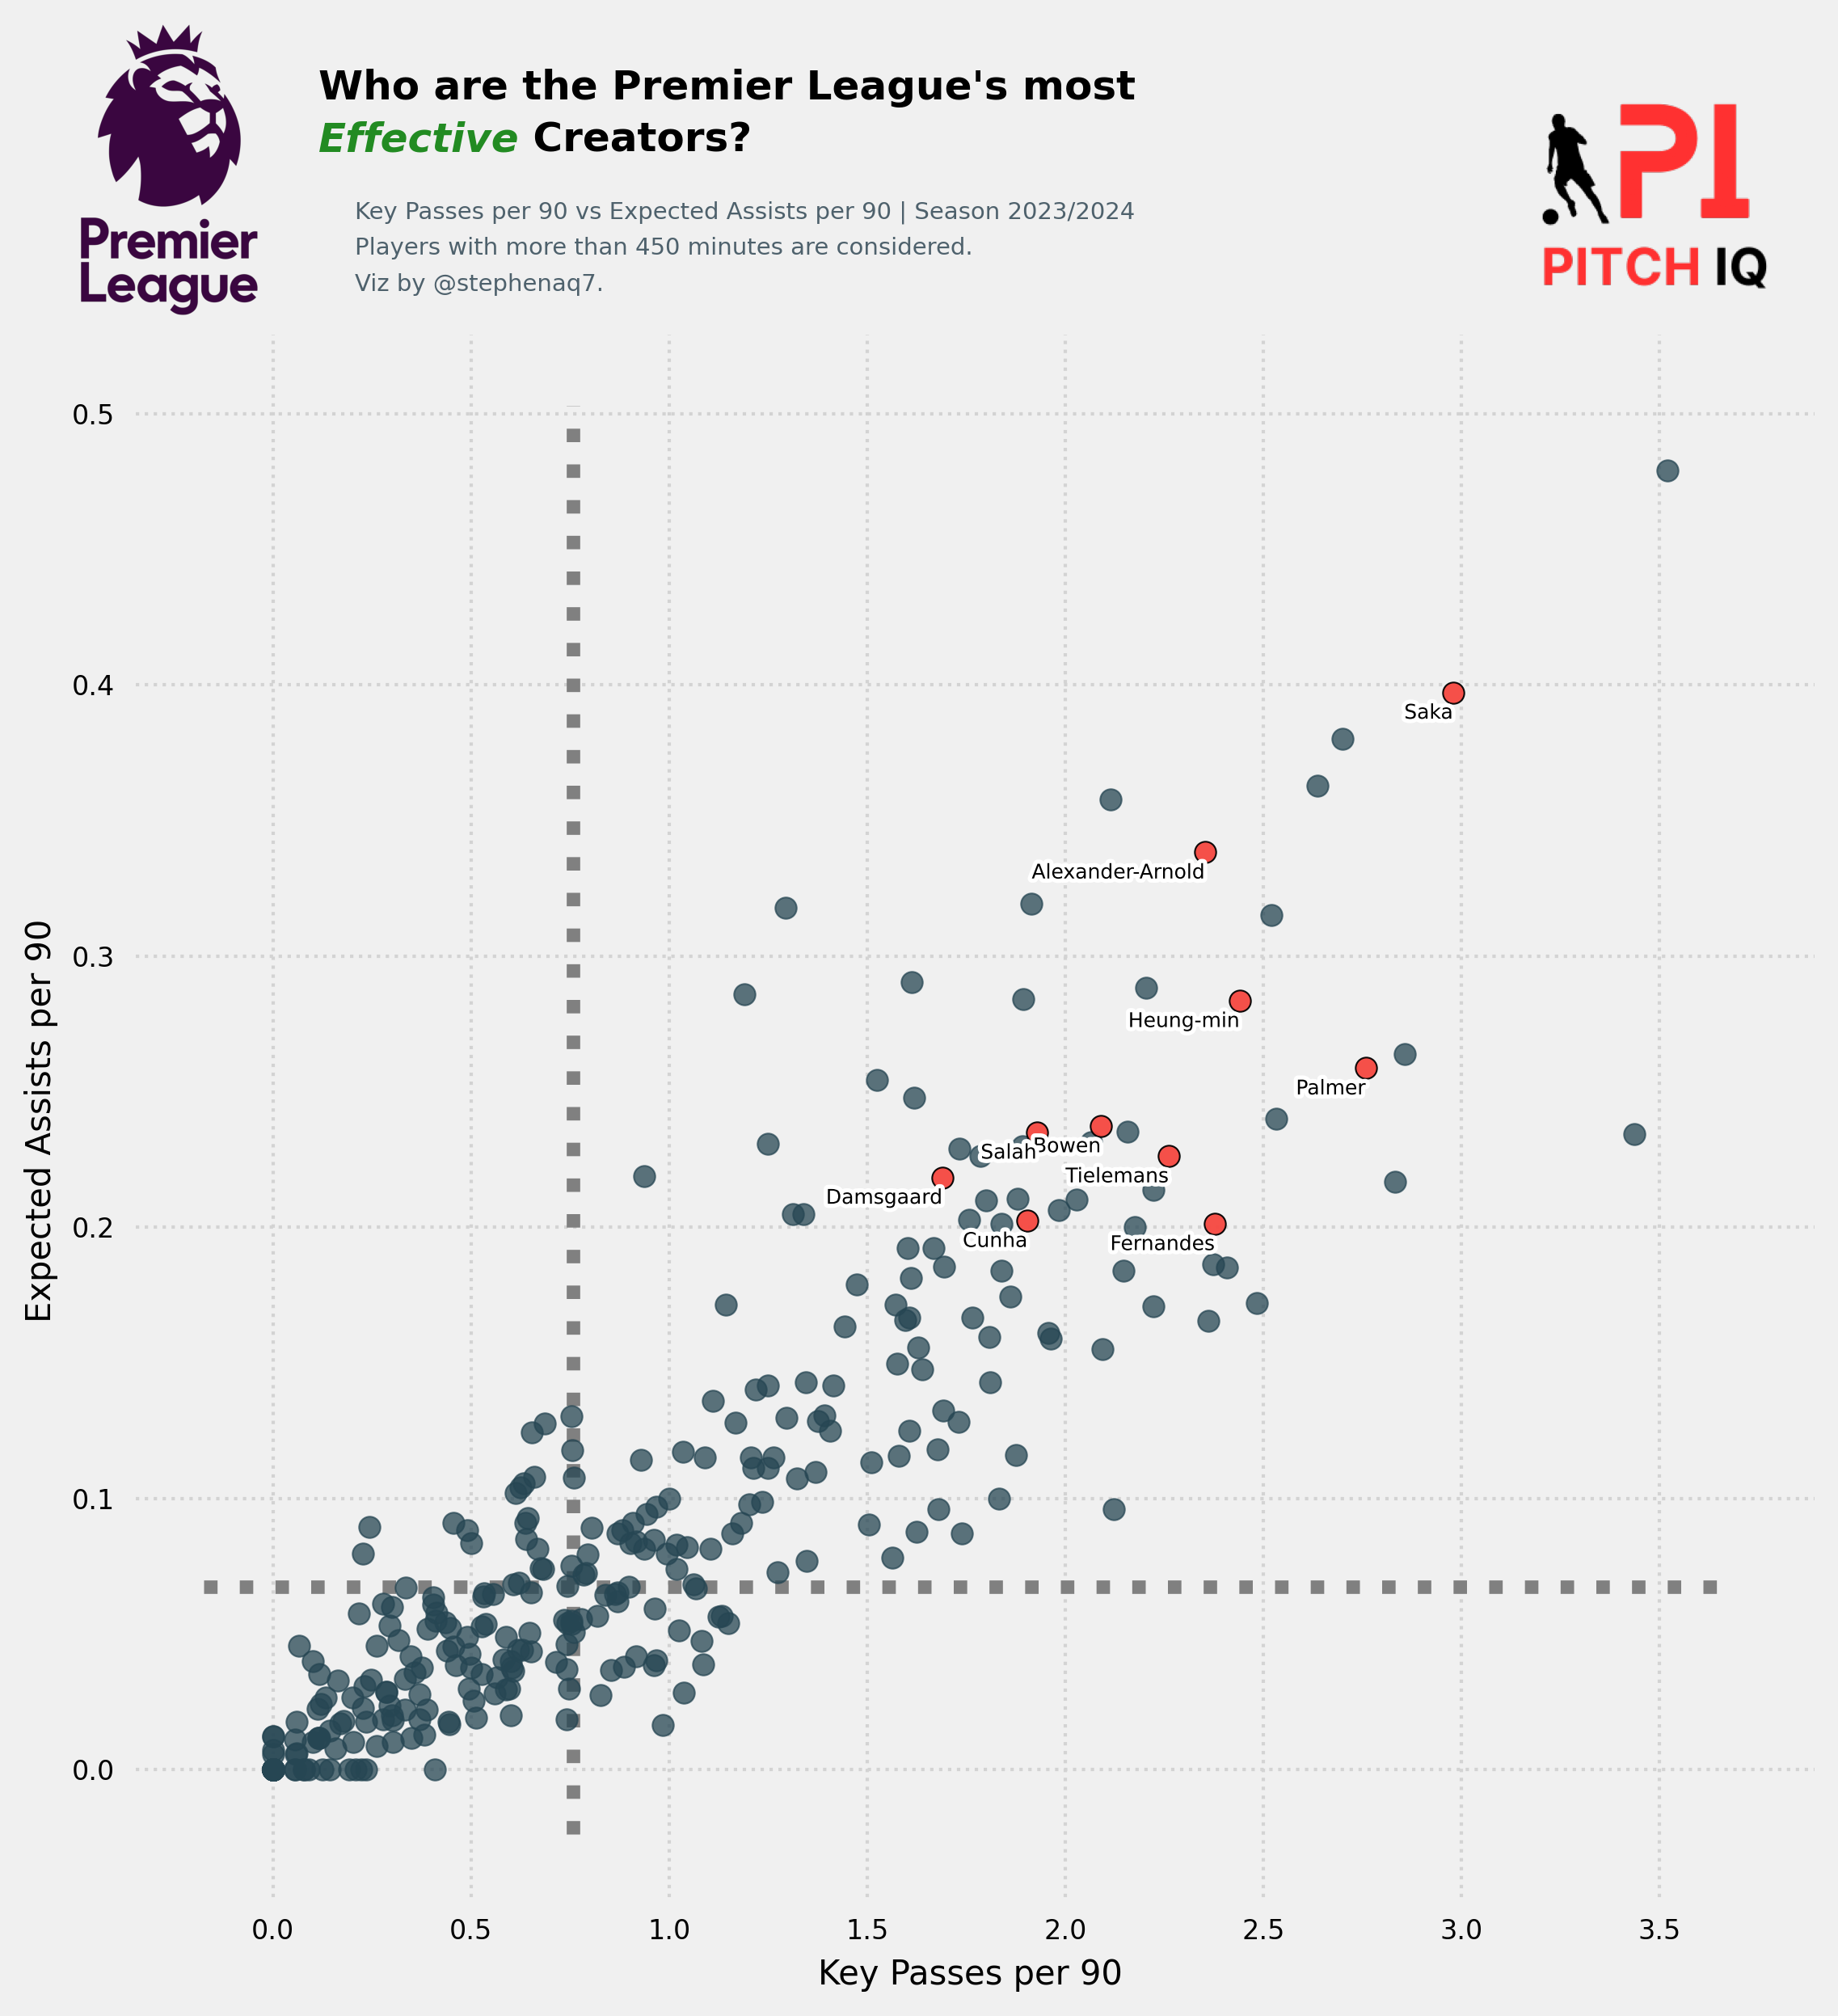

In [10]:
create_scatter_plot(players,Player_stats,x_var,y_var,Title)

### Shooting Player Stats

In [11]:
Player_stats = stats[['Player','position_group', 'SoT/90', 'xG','90s',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']]
Player_stats['Shots on Target per 90'] = Player_stats['SoT/90']
Player_stats['Non-Penalty xG per 90'] = Player_stats['npxG']/Player_stats['90s']
Player_stats = Player_stats[Player_stats['90s'] >= 4.5]
top_7 = Player_stats.nlargest(10, 'xG')
players = top_7['Player'].tolist()

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
x_var = 'Shots on Target per 90'
y_var = 'Non-Penalty xG per 90'
Title = "Who are the Premier League's top\n<Shooters> ?"

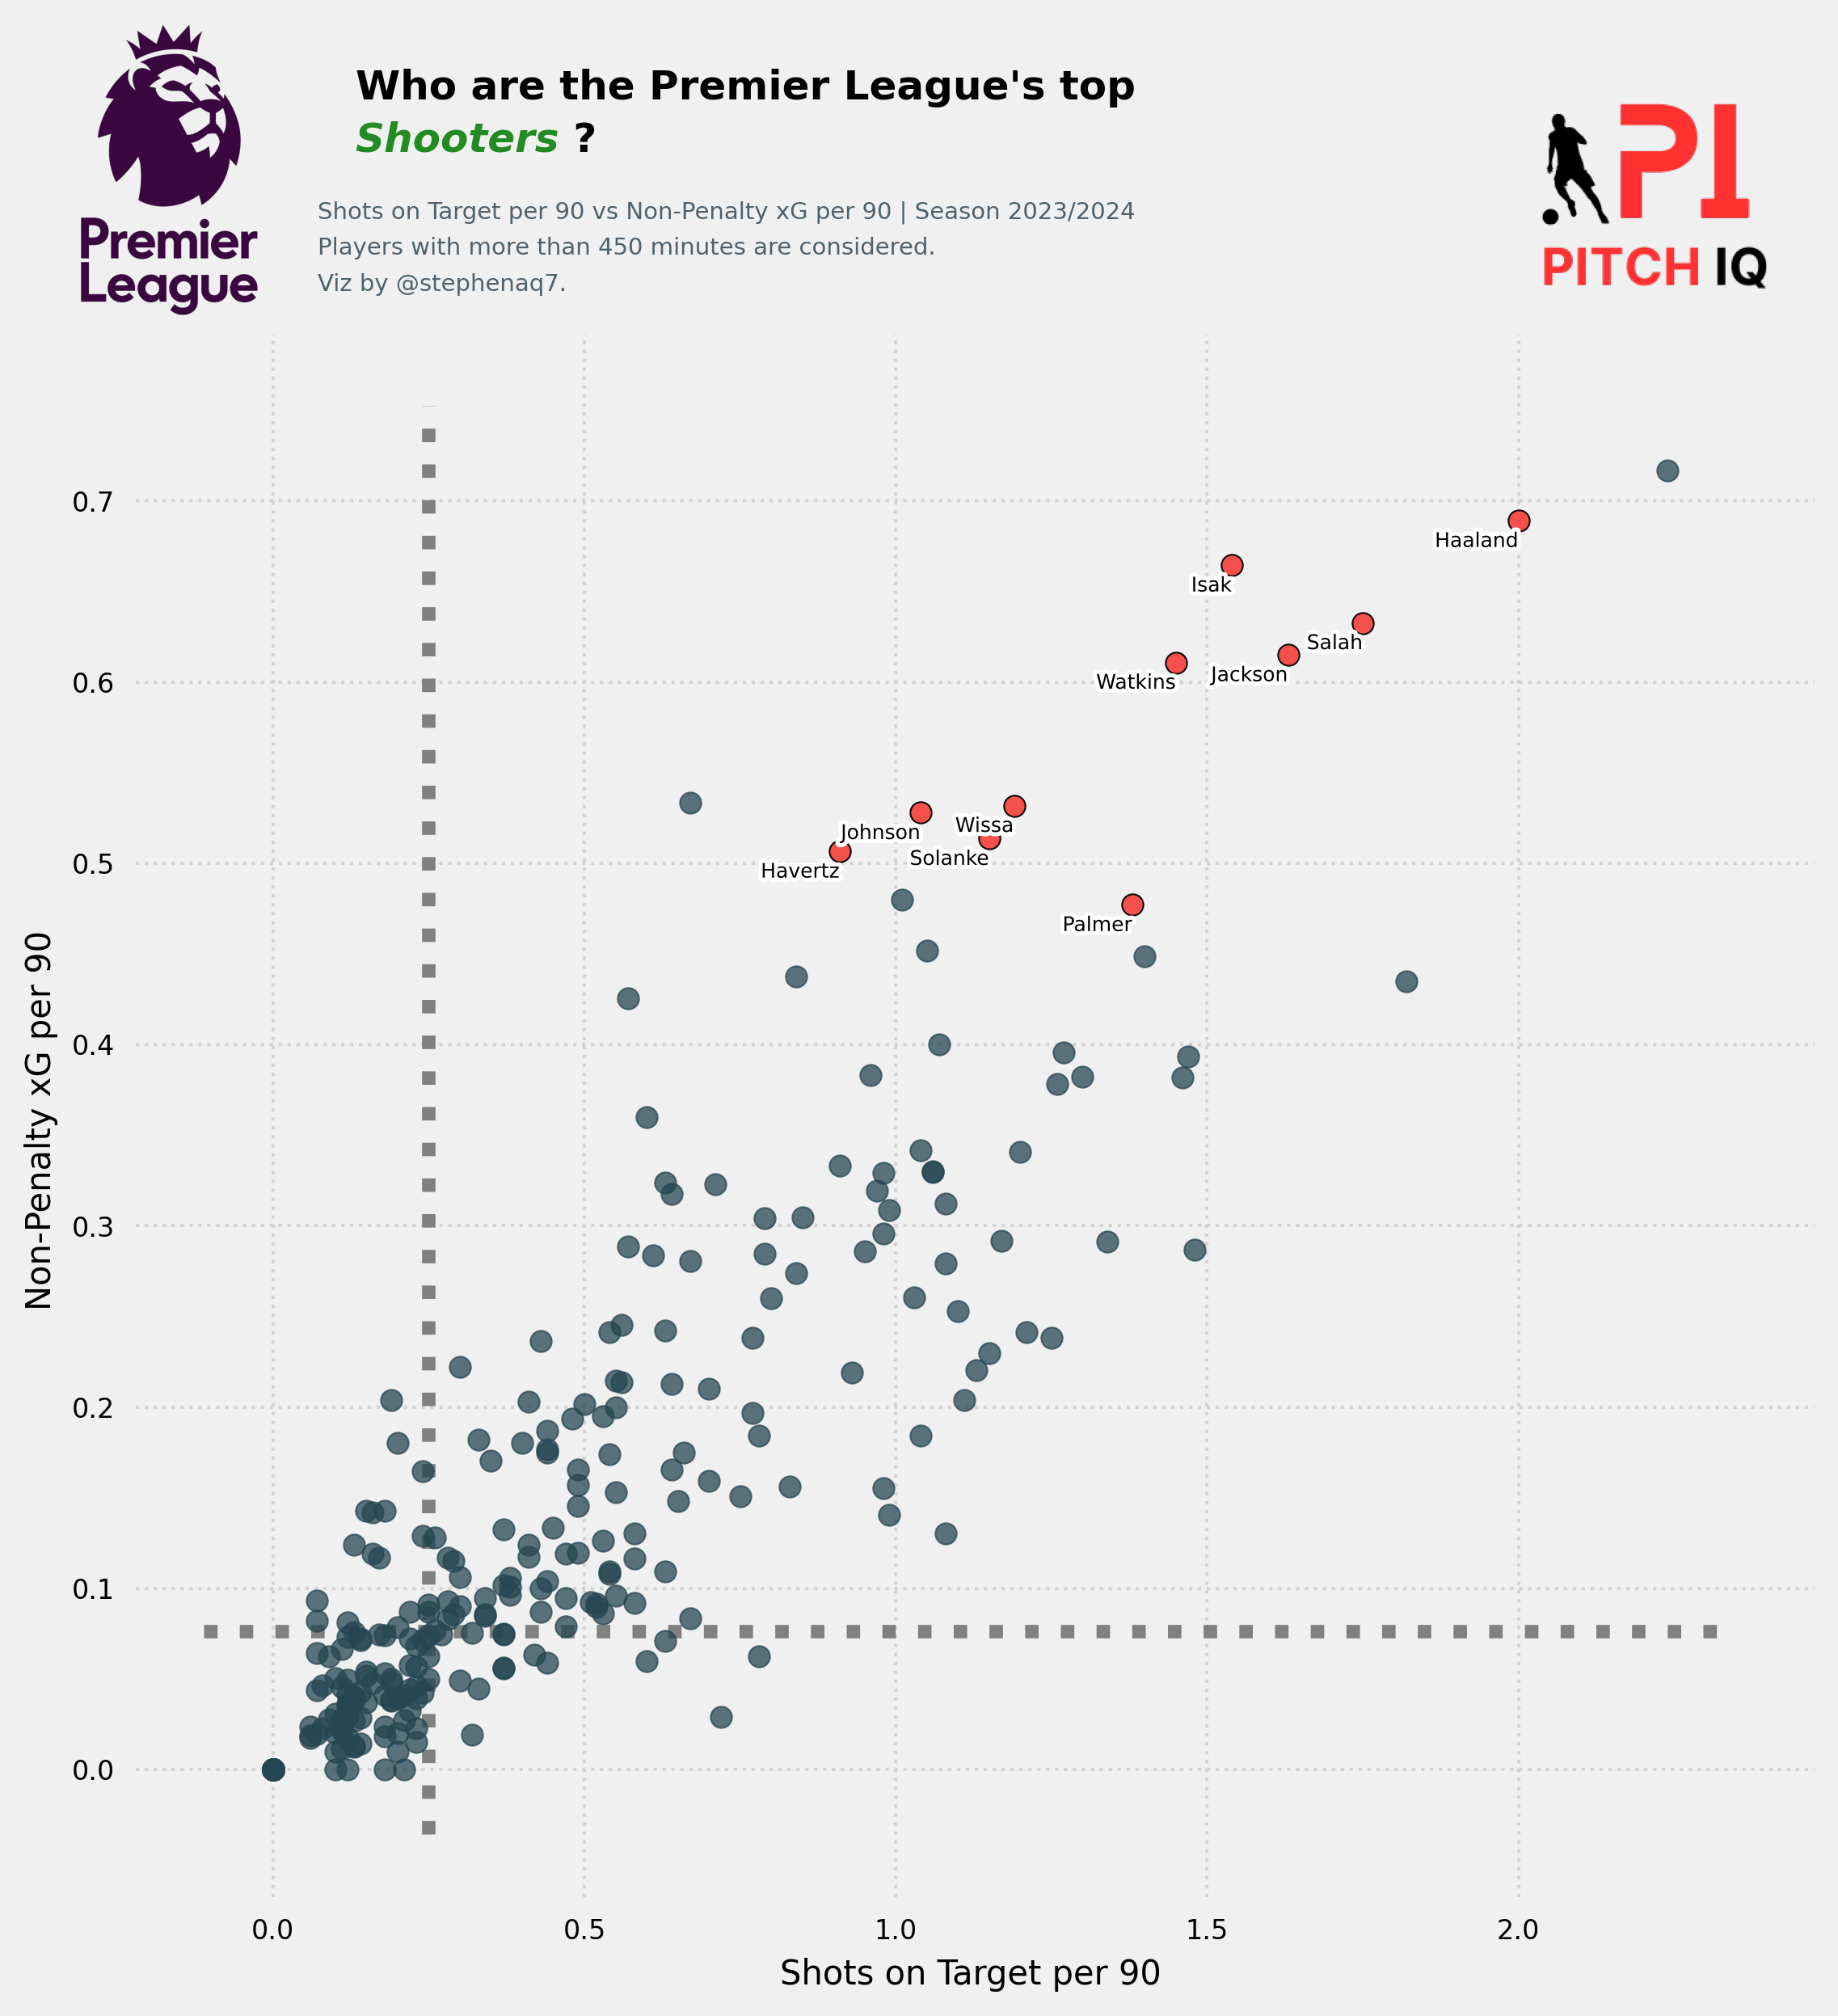

In [13]:
create_scatter_plot(players,Player_stats,x_var,y_var,Title)

In [14]:
stats.to_csv('test.csv')

In [15]:
stats = create_full_stats_db()

ValueError: No tables found

In [ ]:
non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
key_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Total Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']


In [ ]:
stats.dropna(axis=0, how='any', inplace=True)
defender_stats = stats[stats['position_group'] == 'Defender']
defender_stats = defender_stats[non_numeric_cols + key_stats]
defender_stats = defender_stats[defender_stats['90s'] > 5]


In [ ]:
defender_stats

,Player,Nation,Pos,Squad,Age,position_group,90s,Total - Cmp%,KP,TB,Sw,PPA,PrgP,Tkl%,Total Blocks,Tkl+Int,Clr,Carries - PrgDist,SCA90,GCA90,CrsPA,xA,Rec,PrgR,xG,Sh,SoT
0,Max Aarons,eng ENG,DF,Bournemouth,24-059,Defender,12.1,75.6,7,2,3,12,40,63.3,9,34,23,998,1.67,0.08,2,0.9,310,22,0.0,0,0
2,Tosin Adarabioyo,eng ENG,DF,Fulham,26-161,Defender,11.0,84.0,1,1,6,2,32,71.4,11,31,58,1719,0.54,0.00,0,0.1,616,2,0.3,9,3
5,Nayef Aguerd,ma MAR,DF,West Ham,27-339,Defender,18.7,79.5,3,1,28,1,61,76.5,28,38,81,2054,0.69,0.00,0,0.3,806,3,1.5,14,3
8,Anel Ahmedhodžić,ba BIH,DF,Sheffield Utd,24-343,Defender,19.5,76.1,1,0,1,1,27,59.4,30,65,88,1219,0.97,0.05,0,0.1,491,17,2.5,15,3
9,Ola Aina,ng NGA,DF,Nott'ham Forest,27-147,Defender,11.0,74.0,5,1,0,3,30,73.9,10,34,38,934,1.55,0.09,1,0.4,275,22,0.2,6,1
10,Rayan Aït Nouri,dz ALG,"DF,MF",Wolves,22-271,Defender,17.9,84.3,19,2,2,10,79,62.1,23,60,30,1695,2.50,0.11,2,1.4,693,72,1.6,13,1
11,Kristoffer Ajer,no NOR,DF,Brentford,25-321,Defender,12.4,74.7,9,1,9,2,37,64.0,14,38,49,1070,1.69,0.16,2,2.0,388,26,0.7,6,1
12,Manuel Akanji,ch SUI,"DF,MF",Manchester City,28-228,Defender,17.6,92.9,6,4,10,9,93,53.8,21,41,51,3213,1.87,0.17,1,1.1,1285,21,0.9,10,4
13,Nathan Aké,nl NED,DF,Manchester City,29-014,Defender,17.2,92.2,9,1,2,4,89,68.8,12,27,38,2611,1.92,0.35,1,1.0,1144,13,1.6,18,4
15,Trent Alexander-Arnold,eng ENG,DF,Liverpool,25-148,Defender,18.0,74.8,53,19,24,42,153,29.9,13,51,39,1990,5.49,0.39,12,4.6,1087,65,1.8,30,4


In [ ]:
def per_90fi(dataframe):
    # Replace empty strings ('') with NaN
    # dataframe = dataframe.replace('', np.nan)
    
    # Fill NaN values with 0
    dataframe = dataframe.fillna(0)
    
    # Convert numeric columns to numeric type
    numeric_columns = [col for col in dataframe.columns if np.issubdtype(dataframe[col].dtype, np.number)]
    numeric_columns = [value for value in numeric_columns if value != "90s"]
    
    # Exclude specified columns from the normalization
    exclude_columns = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'position_group','90s']
    
    # Identify numeric columns to divide by '90s' and exclude columns with '%' and '90' in their names
    columns_to_divide = [col for col in numeric_columns if col not in exclude_columns 
                         and '90' not in col and '%' not in col and '90s' not in col]
    
    # Create a mask to avoid division by zero or blank values
    mask = (dataframe['90s'] != 0) 
    
    # Divide each identified column by the '90s' column, handling division by zero or blank values

    for col in columns_to_divide:
        dataframe.loc[mask, col] /= dataframe.loc[mask, '90s']

    return dataframe

# Assuming 'your_dataframe' contains your dataset
# Call the function to perform the normalization
defender_stats = per_90fi(defender_stats)


In [ ]:
defender_stats

,Player,Nation,Pos,Squad,Age,position_group,90s,Total - Cmp%,KP,TB,Sw,PPA,PrgP,Tkl%,Total Blocks,Tkl+Int,Clr,Carries - PrgDist,SCA90,GCA90,CrsPA,xA,Rec,PrgR,xG,Sh,SoT
0,Max Aarons,eng ENG,DF,Bournemouth,24-059,Defender,12.1,75.6,0.578512,0.165289,0.247934,0.991736,3.305785,63.3,0.743802,2.809917,1.900826,82.479339,1.67,0.08,0.165289,0.074380,25.619835,1.818182,0.000000,0.000000,0.000000
2,Tosin Adarabioyo,eng ENG,DF,Fulham,26-161,Defender,11.0,84.0,0.090909,0.090909,0.545455,0.181818,2.909091,71.4,1.000000,2.818182,5.272727,156.272727,0.54,0.00,0.000000,0.009091,56.000000,0.181818,0.027273,0.818182,0.272727
5,Nayef Aguerd,ma MAR,DF,West Ham,27-339,Defender,18.7,79.5,0.160428,0.053476,1.497326,0.053476,3.262032,76.5,1.497326,2.032086,4.331551,109.839572,0.69,0.00,0.000000,0.016043,43.101604,0.160428,0.080214,0.748663,0.160428
8,Anel Ahmedhodžić,ba BIH,DF,Sheffield Utd,24-343,Defender,19.5,76.1,0.051282,0.000000,0.051282,0.051282,1.384615,59.4,1.538462,3.333333,4.512821,62.512821,0.97,0.05,0.000000,0.005128,25.179487,0.871795,0.128205,0.769231,0.153846
9,Ola Aina,ng NGA,DF,Nott'ham Forest,27-147,Defender,11.0,74.0,0.454545,0.090909,0.000000,0.272727,2.727273,73.9,0.909091,3.090909,3.454545,84.909091,1.55,0.09,0.090909,0.036364,25.000000,2.000000,0.018182,0.545455,0.090909
10,Rayan Aït Nouri,dz ALG,"DF,MF",Wolves,22-271,Defender,17.9,84.3,1.061453,0.111732,0.111732,0.558659,4.413408,62.1,1.284916,3.351955,1.675978,94.692737,2.50,0.11,0.111732,0.078212,38.715084,4.022346,0.089385,0.726257,0.055866
11,Kristoffer Ajer,no NOR,DF,Brentford,25-321,Defender,12.4,74.7,0.725806,0.080645,0.725806,0.161290,2.983871,64.0,1.129032,3.064516,3.951613,86.290323,1.69,0.16,0.161290,0.161290,31.290323,2.096774,0.056452,0.483871,0.080645
12,Manuel Akanji,ch SUI,"DF,MF",Manchester City,28-228,Defender,17.6,92.9,0.340909,0.227273,0.568182,0.511364,5.284091,53.8,1.193182,2.329545,2.897727,182.556818,1.87,0.17,0.056818,0.062500,73.011364,1.193182,0.051136,0.568182,0.227273
13,Nathan Aké,nl NED,DF,Manchester City,29-014,Defender,17.2,92.2,0.523256,0.058140,0.116279,0.232558,5.174419,68.8,0.697674,1.569767,2.209302,151.802326,1.92,0.35,0.058140,0.058140,66.511628,0.755814,0.093023,1.046512,0.232558
15,Trent Alexander-Arnold,eng ENG,DF,Liverpool,25-148,Defender,18.0,74.8,2.944444,1.055556,1.333333,2.333333,8.500000,29.9,0.722222,2.833333,2.166667,110.555556,5.49,0.39,0.666667,0.255556,60.388889,3.611111,0.100000,1.666667,0.222222


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def create_metrics_scores(df):
    # Define the key_stats grouped by the metrics
    core_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Total Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    passing_metrics = ['Total - Cmp%', 'KP', 'TB', 'Sw', 'PPA', 'PrgP']
    defending_metrics = ['Tkl%', 'Total Blocks', 'Tkl+Int', 'Clr']
    creation_metrics = ['Carries - PrgDist', 'SCA90', 'GCA90', 'CrsPA', 'xA', 'Rec', 'PrgR']
    shooting_metrics = ['xG', 'Sh', 'SoT']

    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()

    # Normalize the metrics
    stats_normalized = df.copy()  # Create a copy of the DataFrame
    stats_normalized[core_stats] = scaler.fit_transform(stats_normalized[core_stats])

    # Calculate scores for each metric grouping and scale to 0-10
    stats_normalized['Passing_Score'] = stats_normalized[passing_metrics].mean(axis=1) * 10
    stats_normalized['Defending_Score'] = stats_normalized[defending_metrics].mean(axis=1) * 10
    stats_normalized['Creation_Score'] = stats_normalized[creation_metrics].mean(axis=1) * 10
    stats_normalized['Shooting_Score'] = stats_normalized[shooting_metrics].mean(axis=1) * 10

    # Add a small offset to ensure unique scores
    stats_normalized['Passing_Score'] += stats_normalized.index * 0.001
    stats_normalized['Defending_Score'] += stats_normalized.index * 0.001
    stats_normalized['Creation_Score'] += stats_normalized.index * 0.001
    stats_normalized['Shooting_Score'] += stats_normalized.index * 0.001

    # Clip scores to ensure they are within the 0-10 range
    stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']] = stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']].clip(lower=0, upper=10)
    return stats_normalized

def adjust_player_rating_range(dataframe):
    # Get the 'total player rating' column
    player_ratings = dataframe[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
    
    # Define the desired range for the ratings
    min_rating = 4.5
    max_rating = 9.5
    
    # Normalize the ratings to be within the desired range (5 to 9.5) for each column
    for col in player_ratings.columns:
        normalized_ratings = min_rating + (max_rating - min_rating) * ((player_ratings[col] - player_ratings[col].min()) / (player_ratings[col].max() - player_ratings[col].min()))
        dataframe[col] = normalized_ratings
    
    return dataframe


pitch_iq_scoring = create_metrics_scores(defender_stats)
pitch_iq_scoring = adjust_player_rating_range(pitch_iq_scoring)
pitch_iq_scoring = pitch_iq_scoring[['Player','Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
defender_stats = pd.merge(defender_stats, pitch_iq_scoring, on='Player', how='left')


In [ ]:
Player_stats = defender_stats[['Player',
 'Nation',
 'Pos',
 'Squad',
 'Age',
'Passing_Score',
 'Defending_Score',
 'Creation_Score',
 'Shooting_Score']].sort_values(by='Defending_Score', ascending=False)


In [ ]:
top_7 = Player_stats.nlargest(10, 'Passing_Score')
players = top_7['Player'].tolist()
x_var = 'Passing_Score'	
y_var = 'Defending_Score'
Title = "Who are the Premier League's top\n<Ball Playing> Defenders?"

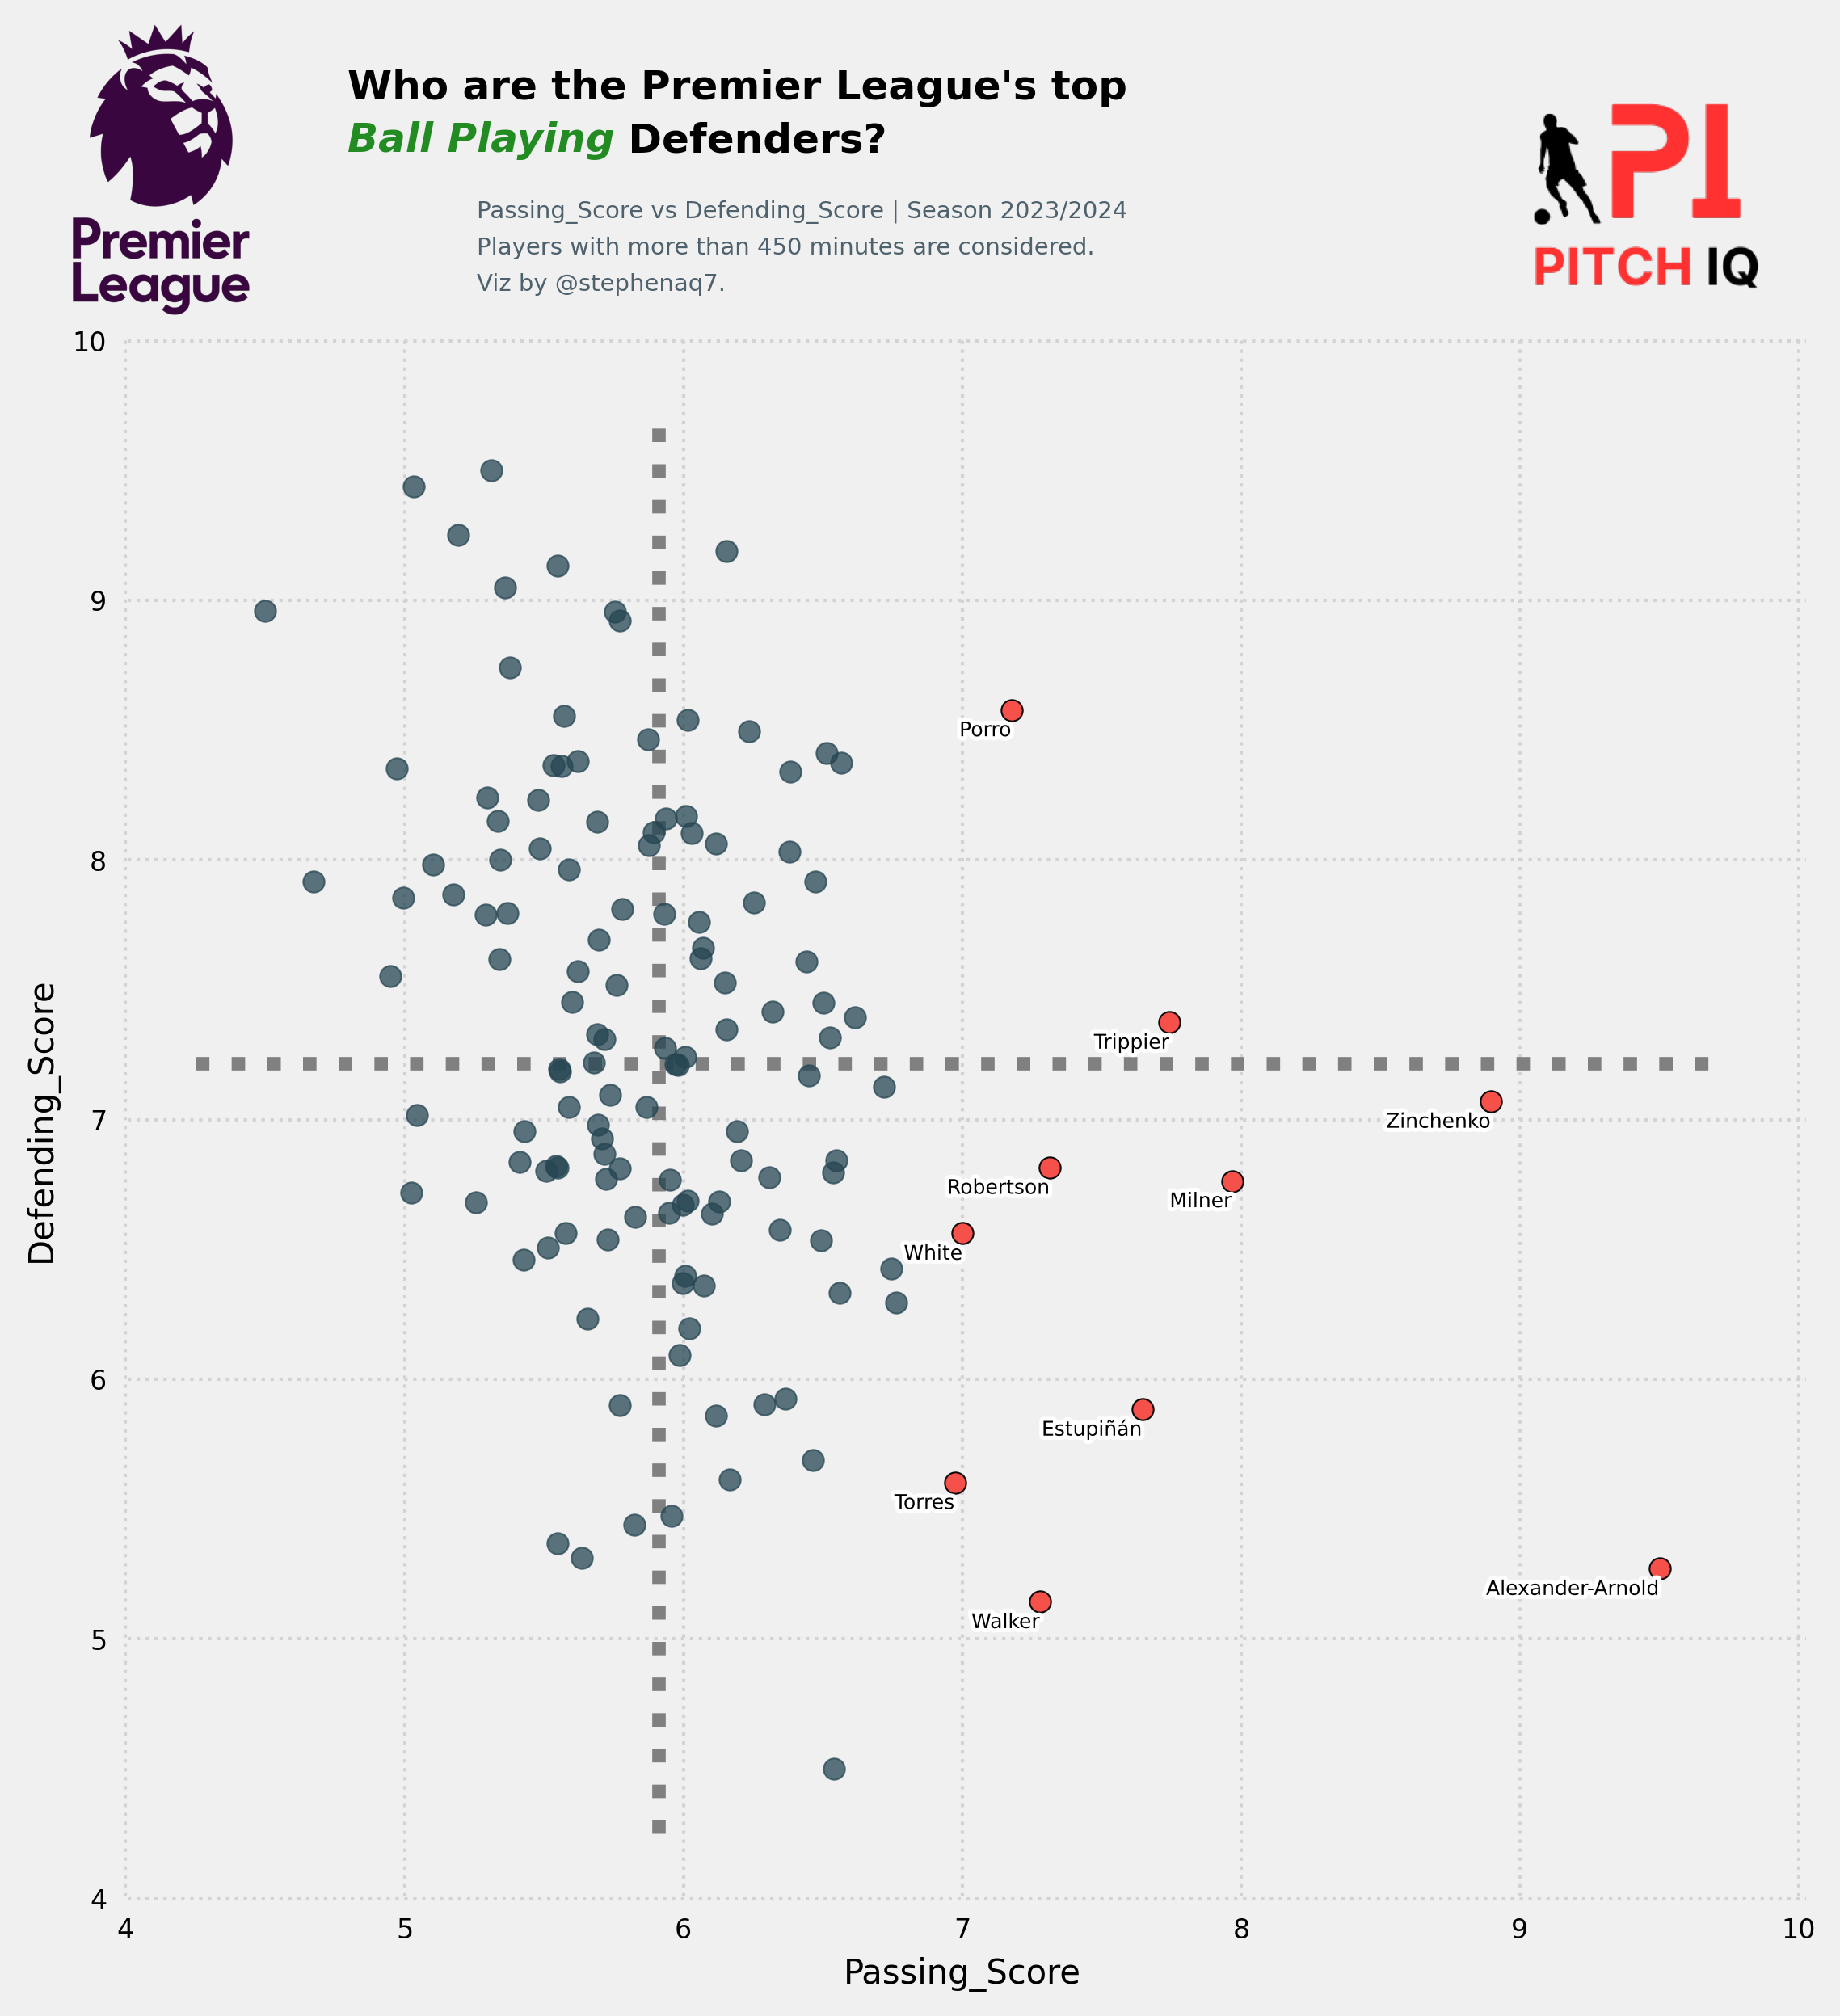

In [ ]:
create_scatter_plot(players,Player_stats,x_var,y_var,Title)